In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from src.dataGenerator import DataGenerator

# Data Generation

## Parameter Setup

In [3]:
config = {
    "Nold": 500, 
    "oldTreatRate": 0.04,
    
    "Nyoung": 500,
    "youngTreatRate": 0.96
}
dataGenerator = DataGenerator(config)
Nold = config["Nold"]
oldTreatRate = config["oldTreatRate"]
Nyoung = config["Nyoung"]
youngTreatRate = config["youngTreatRate"]

In [4]:
# ========== local control ==========
doRandomCoefficient = False#True
# ========== local control ==========

A = 5
B = 15
C = 45
D = 95

if doRandomCoefficient:
    set1 = np.arange(1, 11) * (-1) ** np.random.randint(0, 2)
    set2 = np.arange(11, 21) * (-1) ** np.random.randint(0, 2)
    set3 = np.arange(41, 51) * (-1) ** np.random.randint(0, 2)
    set4 = np.arange(91, 101) * (-1) ** np.random.randint(0, 2)
    coefConfig = [set1, set2, set3, set4]
    random.shuffle(coefConfig)
    A = dataGenerator.getCoefficient(candidate = coefConfig[0])
    B = dataGenerator.getCoefficient(candidate = coefConfig[1])
    C = dataGenerator.getCoefficient(candidate = coefConfig[2])
    D = dataGenerator.getCoefficient(candidate = coefConfig[3])

coefficients = {
    "A": A, 
    "B": B, 
    "C": C, 
    "D": D,
}

print(coefficients)

{'A': 5, 'B': 15, 'C': 45, 'D': 95}


## Patient Data Setup

In [5]:
# Treatment
youngT = dataGenerator.getTreatment(ageType=-1)
oldT = dataGenerator.getTreatment(ageType=1)

# Sex (binary, 0 is female and 1 is male)
oldSex = dataGenerator.getSex(treatment=oldT)
youngSex = dataGenerator.getSex(treatment=youngT)

# Age (binary, 0 is young and 1 is old)
youngAge = dataGenerator.getAge(ageType=-1)
oldAge = dataGenerator.getAge(ageType=1)

In [6]:
oldData = np.vstack((oldT, oldAge, oldSex)).T
oldData = pd.DataFrame(oldData)
oldData = oldData.rename(columns={0:'T', 1:'Age', 2:'Sex'})
oldData = oldData.sample(frac=1)

youngData = np.vstack((youngT, youngAge, youngSex)).T
youngData = pd.DataFrame(youngData)
youngData = youngData.rename(columns={0:'T', 1:'Age', 2:'Sex'})
youngData = youngData.sample(frac=1)

In [7]:
print(oldData.describe())
print('-'*50)
print(youngData.describe())

                T    Age         Sex
count  500.000000  500.0  500.000000
mean    -0.920000    1.0    0.000000
std      0.392311    0.0    1.001002
min     -1.000000    1.0   -1.000000
25%     -1.000000    1.0   -1.000000
50%     -1.000000    1.0    0.000000
75%     -1.000000    1.0    1.000000
max      1.000000    1.0    1.000000
--------------------------------------------------
                T    Age         Sex
count  500.000000  500.0  500.000000
mean     0.920000   -1.0    0.000000
std      0.392311    0.0    1.001002
min     -1.000000   -1.0   -1.000000
25%      1.000000   -1.0   -1.000000
50%      1.000000   -1.0    0.000000
75%      1.000000   -1.0    1.000000
max      1.000000   -1.0    1.000000


In [8]:
noiseScale = 5

## Case 1: Apparent Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$D\times Sex \times T$$

In [9]:
oldData['yo1'] = dataGenerator.getOutcome1(oldData, coefficients)
oldData['yo1CF'] = dataGenerator.getOutcome1(oldData, coefficients, CF=True)
oldData['y1'] = dataGenerator.addNoise(oldData['yo1'], scale=noiseScale)
oldData['y1CF'] = dataGenerator.addNoise(oldData['yo1CF'], scale=noiseScale)

youngData['yo1'] = dataGenerator.getOutcome1(youngData, coefficients)
youngData['y1'] = dataGenerator.addNoise(youngData['yo1'], scale=noiseScale)
youngData['yo1CF'] = dataGenerator.getOutcome1(youngData, coefficients, CF=True)
youngData['y1CF'] = dataGenerator.addNoise(youngData['yo1CF'], scale=noiseScale)

## Case 2: Apparent Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$C\times Age + $$
$$D\times Age\times Sex$$

In [10]:
oldData['yo2'] = dataGenerator.getOutcome2(oldData, coefficients)
oldData['yo2CF'] = dataGenerator.getOutcome2(oldData, coefficients, CF=True)
oldData['y2'] = dataGenerator.addNoise(oldData['yo2'], scale=noiseScale)
oldData['y2CF'] = dataGenerator.addNoise(oldData['yo2CF'], scale=noiseScale)

youngData['yo2'] = dataGenerator.getOutcome2(youngData, coefficients)
youngData['y2'] = dataGenerator.addNoise(youngData['yo2'], scale=noiseScale)
youngData['yo2CF'] = dataGenerator.getOutcome2(youngData, coefficients, CF=True)
youngData['y2CF'] = dataGenerator.addNoise(youngData['yo2CF'], scale=noiseScale)

## Case 3: Genuine Imbalance
$$y = A\times Sex +$$
$$B\times T + $$
$$C\times Age + $$
$$D\times Age\times T$$

In [11]:
oldData['yo3'] = dataGenerator.getOutcome3(oldData, coefficients)
oldData['yo3CF'] = dataGenerator.getOutcome3(oldData, coefficients, CF=True)
oldData['y3'] = dataGenerator.addNoise(oldData['yo3'], scale=noiseScale)
oldData['y3CF'] = dataGenerator.addNoise(oldData['yo3CF'], scale=noiseScale)

youngData['yo3'] = dataGenerator.getOutcome3(youngData, coefficients)
youngData['y3'] = dataGenerator.addNoise(youngData['yo3'], scale=noiseScale)
youngData['yo3CF'] = dataGenerator.getOutcome3(youngData, coefficients, CF=True)
youngData['y3CF'] = dataGenerator.addNoise(youngData['yo3CF'], scale=noiseScale)

In [12]:
totalData = pd.concat([oldData, youngData], axis=0).sample(frac=1)
totalData

,T,Age,Sex,yo1,yo1CF,y1,y1CF,yo2,yo2CF,y2,y2CF,yo3,yo3CF,y3,y3CF
307,-1,1,-1,75,-85,67.670569,-91.197585,-70,-40,-67.914684,-35.284652,-70,150,-71.144579,142.337083
107,1,-1,-1,-85,75,-85.101624,77.952946,60,30,68.603259,29.398095,-130,30,-131.628843,25.500938
371,1,-1,-1,-85,75,-90.628841,74.416757,60,30,59.722403,29.021503,-130,30,-130.604227,29.436318
341,-1,1,-1,75,-85,82.320055,-89.211498,-70,-40,-64.685140,-45.715835,-70,150,-74.535066,152.882527
158,1,-1,1,115,-105,120.735178,-105.676951,-120,-150,-117.484569,-150.981203,-120,40,-115.233813,41.669531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,1,-1,1,115,-105,115.816680,-110.936328,-120,-150,-121.308107,-154.359286,-120,40,-118.024315,40.990483
355,-1,1,-1,75,-85,74.841405,-73.227739,-70,-40,-74.694997,-43.655376,-70,150,-63.290981,145.373489
104,1,-1,1,115,-105,110.800291,-94.474768,-120,-150,-122.819717,-153.381093,-120,40,-112.564313,39.609845
427,1,-1,-1,-85,75,-87.989904,77.854042,60,30,61.003930,37.410872,-130,30,-130.166291,28.505504


## Quick View

In [13]:
# ========== local control ==========
doDraw = True
doSaveCSV = True
txtSubname = "posnegT004"
# ========== local control ==========
def countNumber(data, x, y):
    uniqueX, uniqueY = np.unique(data[x]), np.unique(data[y])
    countGrid = np.zeros((len(uniqueX), len(uniqueY)))
    for i in range(countGrid.shape[0]): # x length
        for j in range(countGrid.shape[1]): # y length
            countGrid[i, j] = np.sum(np.logical_and(data[x] == uniqueX[i], data[y] == uniqueY[j]))
    return countGrid

def drawGrid(data, x, y, title=None):
    countGrid = countNumber(data, x, y)
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    plt.pcolormesh(countGrid.T, cmap="autumn", edgecolors='black')
    for i in range(countGrid.shape[0]):
        for j in range(countGrid.shape[1]):
            plt.text(i+0.5, j+0.5, int(countGrid[i, j]), va="center", ha="center", size=20)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.xticks([0.5, 1.5], [str(x) for x in np.unique(data[x])], fontsize=15)
    plt.yticks([0.5, 1.5], [str(x) for x in np.unique(data[y])], fontsize=15)
    if title:
        plt.title(title, fontsize=15)
    plt.show()

In [14]:
if doSaveCSV:
    oldData.to_csv("data/oldData{}.csv".format(txtSubname))
    youngData.to_csv("data/youngData{}.csv".format(txtSubname))
    totalData.to_csv("data/totalData{}.csv".format(txtSubname))
    np.savetxt('data/coef.txt', np.array([A, B, C, D]))
    print("Data saved")

Data saved


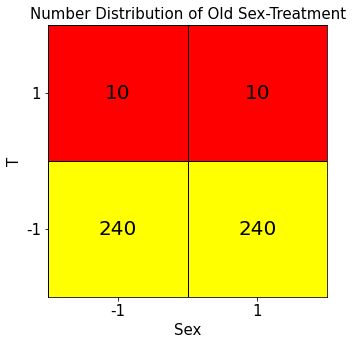

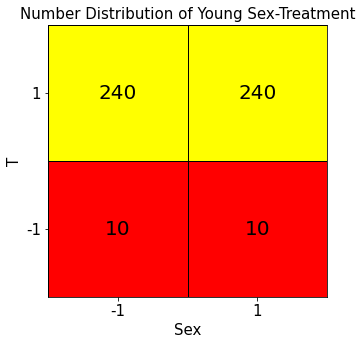

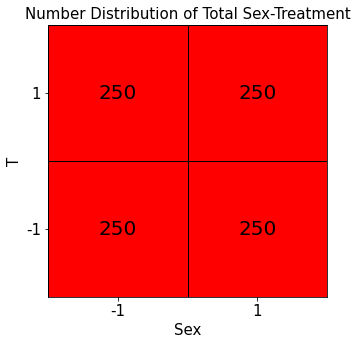

In [15]:
# ========== draw Old/Young/Overall Sex - Treatment ==========
if doDraw: 
    drawGrid(oldData, 'Sex', 'T', title="Number Distribution of Old Sex-Treatment")
    drawGrid(youngData, 'Sex', 'T', title="Number Distribution of Young Sex-Treatment")
    drawGrid(totalData, 'Sex', 'T', title="Number Distribution of Total Sex-Treatment")

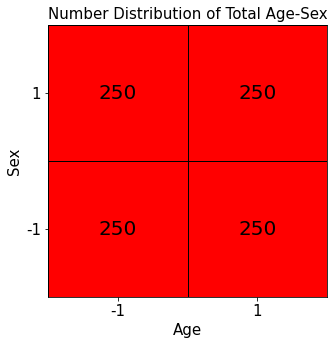

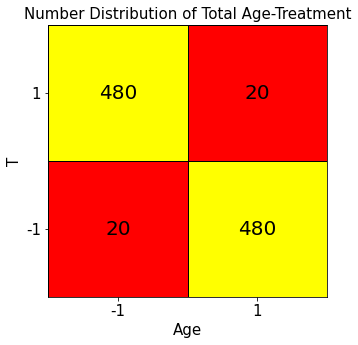

In [16]:
# ========== draw overall Age-Sex & Age-Treatment ==========
if doDraw:
    drawGrid(totalData, 'Age', 'Sex', title="Number Distribution of Total Age-Sex")
    drawGrid(totalData, 'Age', 'T', title="Number Distribution of Total Age-Treatment")

In [17]:
def drawOutcomesVersusRandom(data, yType, title):
    uniqueOutcome, countUnique = np.unique(data['yo'+yType], return_counts=True)

    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    for i in range(len(uniqueOutcome)):
        if np.sum([(data['T'] == 1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == 1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('green')
                pc.set_edgecolor('green')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('green')
                vp.set_facecolor('green')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='green', fontsize=15, ha='center')
        
        elif np.sum([(data['T'] == 1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == -1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == 1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == -1)]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('green')
                pc.set_edgecolor('green')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('green')
                vp.set_facecolor('green')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='green', fontsize=15, ha='center')
            
        elif np.sum([(data['T'] == -1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == -1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == 1)]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('red')
                pc.set_edgecolor('red')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('red')
                vp.set_facecolor('red')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='red', fontsize=15, ha='center')
        
        elif np.sum([(data['T'] == -1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == -1)]):
            VP = plt.violinplot(np.array(data['y'+yType][(data['T'] == -1) * (data['yo'+yType] == uniqueOutcome[i]) * (data['Age'] == -1)]), \
                          positions=[uniqueOutcome[i]], widths=10)
            for pc in VP['bodies']:
                pc.set_facecolor('red')
                pc.set_edgecolor('red')
            for partname in ('cbars','cmins','cmaxes'):
                vp = VP[partname]
                vp.set_edgecolor('red')
                vp.set_facecolor('red')
                vp.set_linewidth(1)
            plt.text(x=uniqueOutcome[i], y=uniqueOutcome[i] + 1.1 * (np.max(data['y'+yType][data['yo'+yType] == uniqueOutcome[i]])-uniqueOutcome[i]), 
                     s=np.array(countUnique, dtype=str)[i], color='red', fontsize=15, ha='center')

    plt.scatter(data['yo'+yType], data['yo'+yType], color='black', zorder=3)
    plt.scatter(data['yo'+yType], data['yo'+yType+'CF'], color='black', zorder=3, marker='x')
    plt.xlabel('Without Noise', fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel('With Noise', fontsize=15)
    plt.yticks(fontsize=15)
    #plt.ylim(np.min(uniqueOutcome)-(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2, np.max(uniqueOutcome)+(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2)
    #plt.xlim(np.min(uniqueOutcome)-(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2, np.max(uniqueOutcome)+(np.max(uniqueOutcome)-np.min(uniqueOutcome))*0.2)
    if title:
        plt.title("Noise Effect | Case {} | {}".format(yType, title), fontsize=20)
    plt.show()

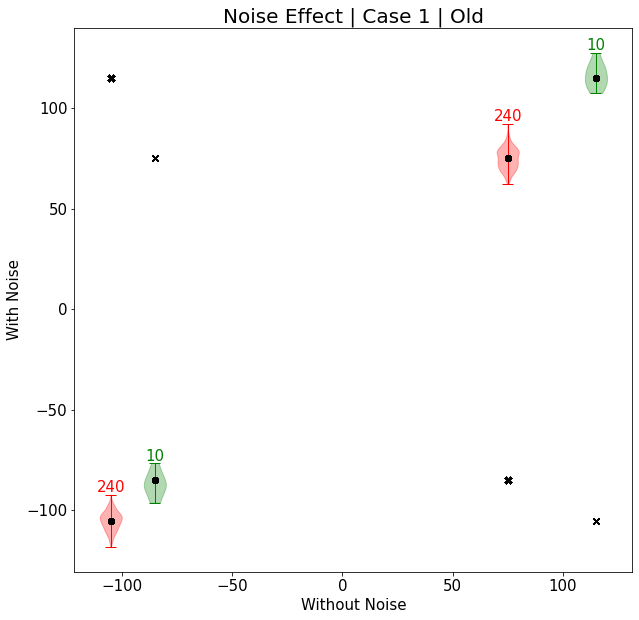

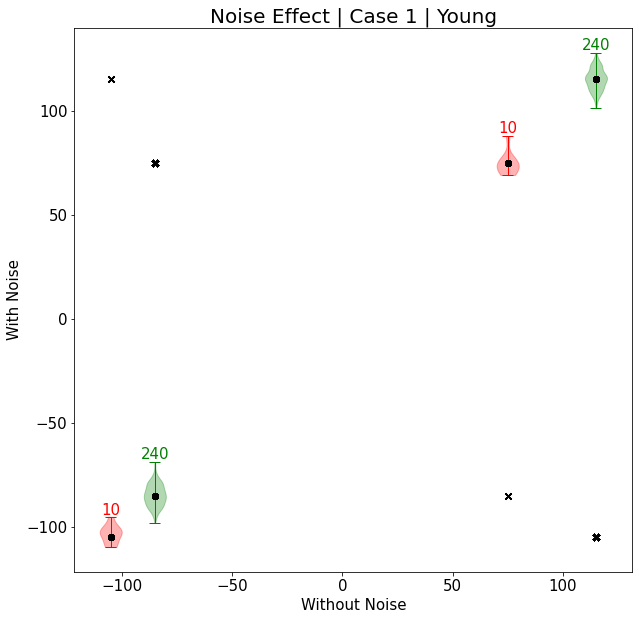

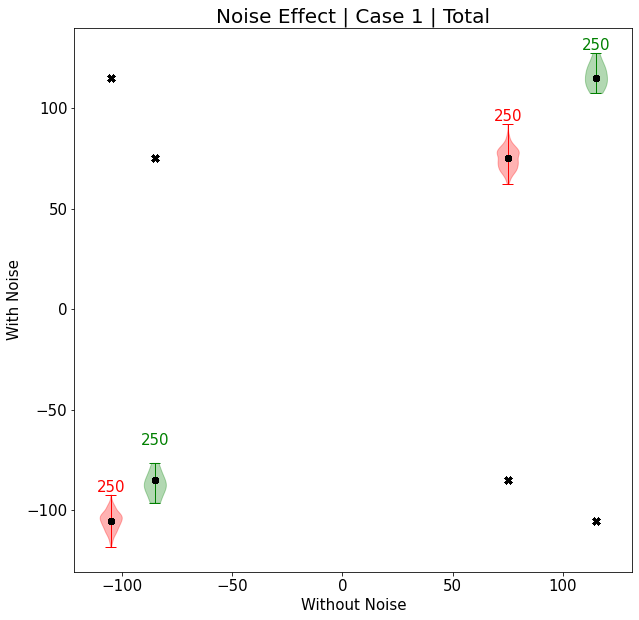

In [18]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '1'
    drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    drawOutcomesVersusRandom(totalData, yType=yType, title='Total')

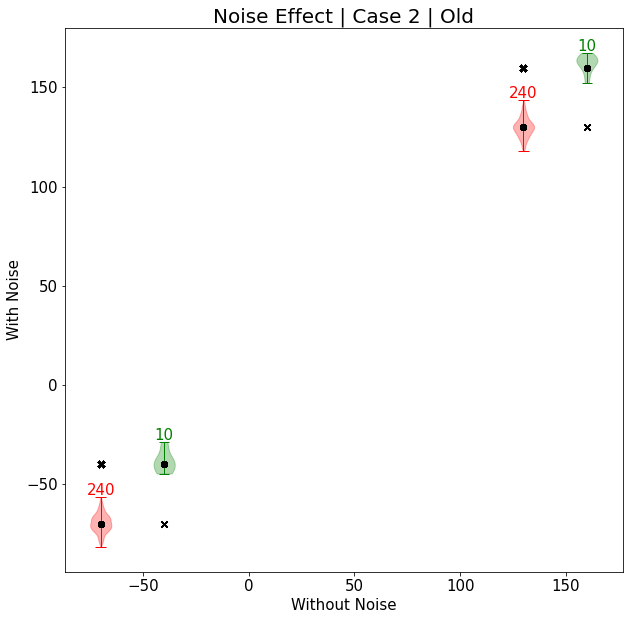

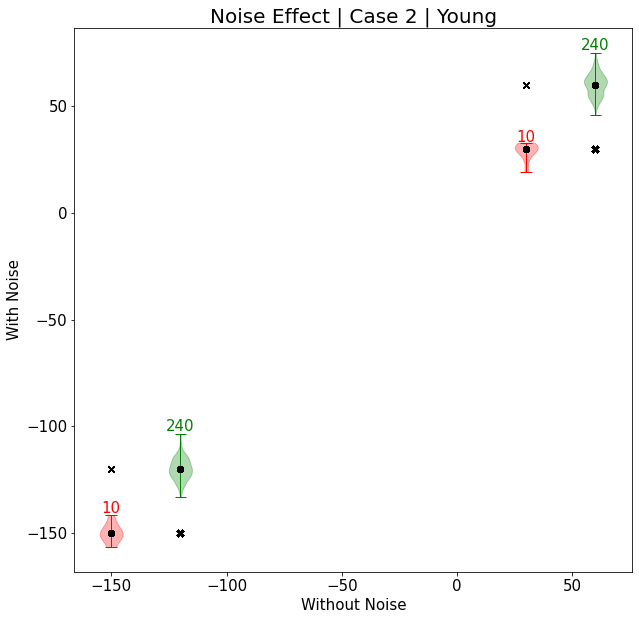

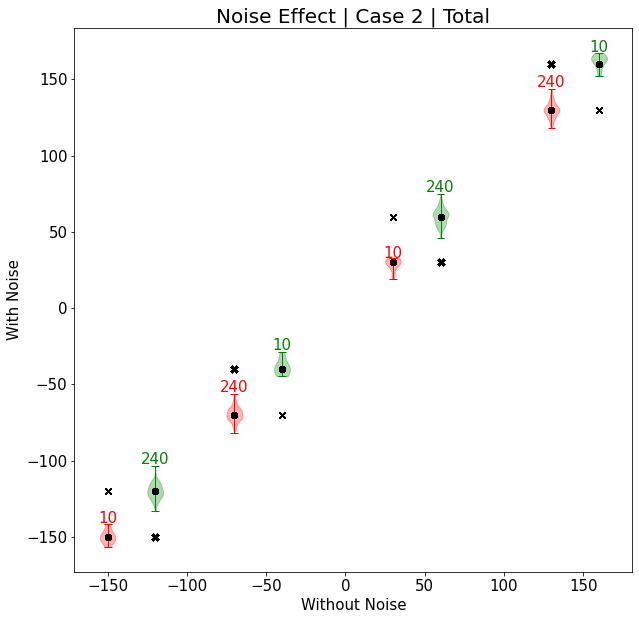

In [19]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '2'
    drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    drawOutcomesVersusRandom(totalData, yType=yType, title='Total')

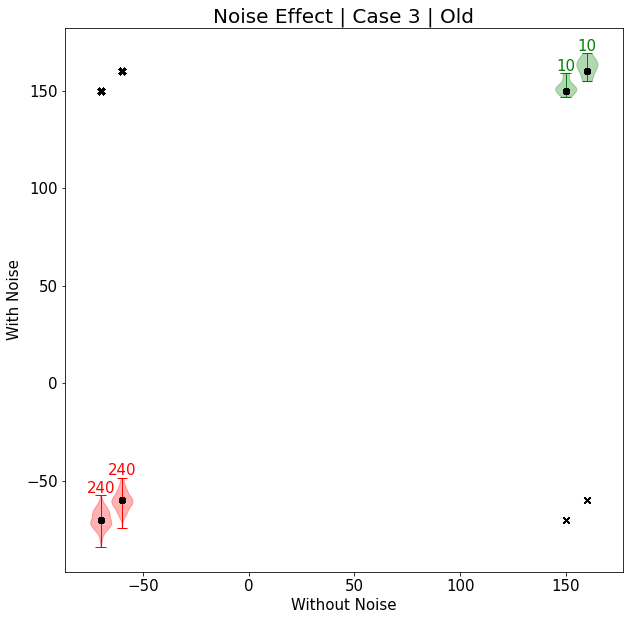

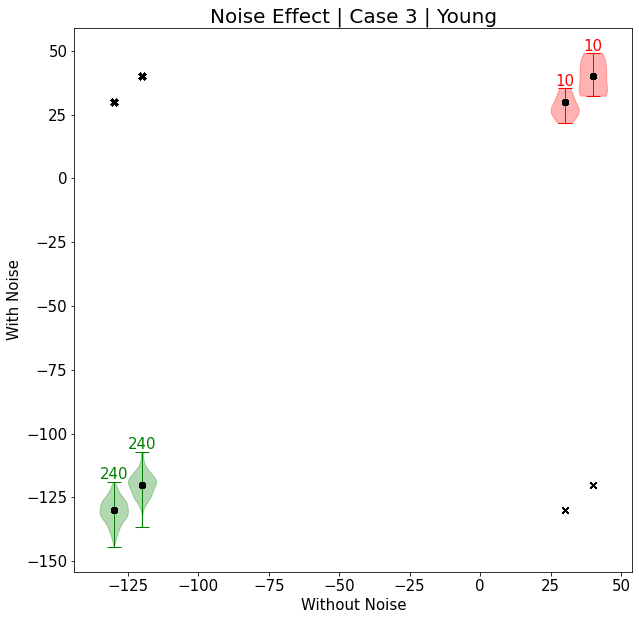

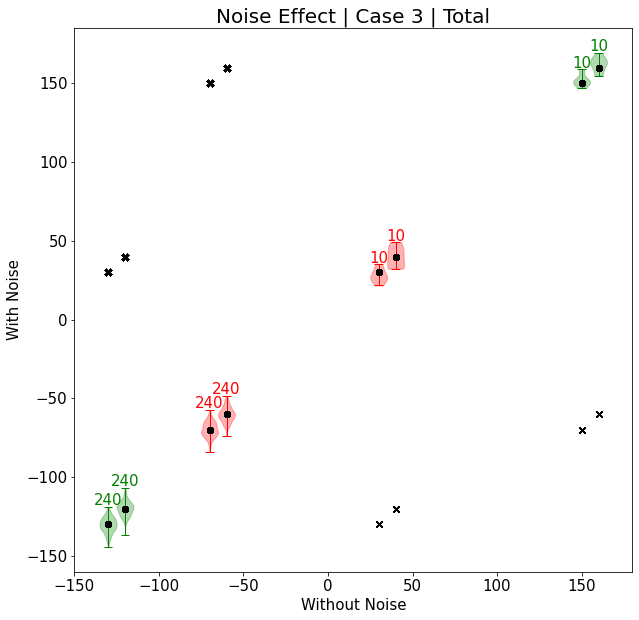

In [20]:
# ========== draw noise effect on origin  y==========
if doDraw:
    yType = '3'
    drawOutcomesVersusRandom(oldData, yType=yType, title='Old')
    drawOutcomesVersusRandom(youngData, yType=yType, title='Young')
    drawOutcomesVersusRandom(totalData, yType=yType, title='Total')